In [1]:
# importing modules required

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sc
import sklearn as sk
import statsmodels as st
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import warnings
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMAResults
from matplotlib import pyplot, legend, figure
from pandas import DataFrame
from scipy.stats import boxcox
from array import *

warnings.filterwarnings("ignore")

In [2]:
# read excel that is filtered to top 5 countries (GDP)
df = pd.read_csv('china_gdp.csv')

In [3]:
# get top 5 rows "df"
df.head()

Country  Year  GDP Value  \
0  China, People's Republic of  1990    346.873   
1  China, People's Republic of  1991    356.759   
2  China, People's Republic of  1992    420.025   
3  China, People's Republic of  1993    520.966   
4  China, People's Republic of  1994    468.658   

                                         Type of GDP  
0  GDP per capita, current prices (U.S. dollars p...  
1  GDP per capita, current prices (U.S. dollars p...  
2  GDP per capita, current prices (U.S. dollars p...  
3  GDP per capita, current prices (U.S. dollars p...  
4  GDP per capita, current prices (U.S. dollars p...

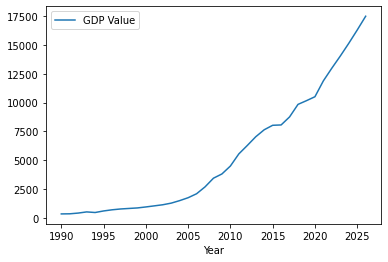

In [4]:
# plot time series of Year vs GDP
top10_gdp_countries = df.groupby(['Year']).sum().plot()

In [5]:
# get top 5 rows of "top5_gdp_countries" after it have been summed, groupby year
top10_gdp_countries = df.groupby(['Year']).sum()
top10_gdp_countries.head()

GDP Value
Year           
1990    346.873
1991    356.759
1992    420.025
1993    520.966
1994    468.658

In [6]:
# reset first column to be index from 0 onwards instead of year
reset_index = df.groupby(['Year']).sum().reset_index()
# show columns of reset_index
reset_index.columns

Index(['Year', 'GDP Value'], dtype='object')

In [7]:
# drop null values if there are

top10_gdp_countries.dropna(inplace=True)

# assigning training and testing dataset based on 50% split
x = top10_gdp_countries.values
train_size = int(len(top10_gdp_countries) * 0.80)
train, test = x[0:train_size], x[train_size:]

In [8]:
# ARIMA model 

# Dataset > period 1990 - 2003
# Validation set > period 2004 - 2018 

# assigning training and testing dataset based on 80% split
train_size = int(len(top10_gdp_countries) * 0.80)
split_point = len(top10_gdp_countries) - 15
dataset, validation = top10_gdp_countries[0:split_point], top10_gdp_countries[split_point:]

# number of years used in each set
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

# save each set into a csv file
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 22, Validation 15


In [9]:
# function arima

def evaluate_arima_model(X, arima_order):

    X = top5_ghg_countries.astype('float32')
    
    # assigning training and testing dataset based on 80% split
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # for every record from historical years, append into a list to be used for prediction
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        
        # expected trend to be non constant, hence trend = nc
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # To calculate RMSE to see how well the model fits
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

In [10]:
# search for optimal ARIMA parameters automatically
# if automatic method does not work, proceed to use manual method below

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA = %s \nRMSE = %.3f' % (best_cfg, best_score))
    
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(top10_gdp_countries.values, p_values, d_values, q_values)

Best ARIMA = None 
RMSE = inf


In [11]:
# Identify best ARIMA model manually

# check if stationary
result = adfuller(top10_gdp_countries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

ADF Statistic: 1.451568
p-value: 0.997336
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


In [12]:
# By looking at the p-value of this test, we cannot reject the null hypothesis, P value < 0.05
# and it is likely that our dataset is non-stationary. We therefore choose the first parameter in 
# our ARIMA model (the p) as a 1. We do not choose a higher number because although our 
# dataset is non-stationary, it is not likely that seasonality is present because we work with annual data.

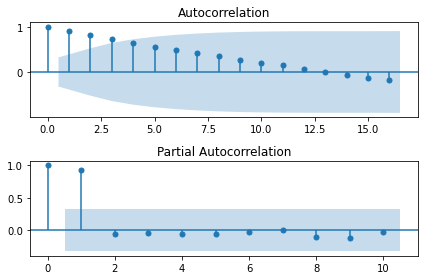

In [13]:
# Creates ACF and PACF plots
pyplot.figure()
pyplot.subplot(211)
plot_acf(top10_gdp_countries, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(top10_gdp_countries, ax=pyplot.gca(), lags = 10)
pyplot.tight_layout()
pyplot.show()

In [14]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    
    # prediction
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    #observation
    obs = test[i]
    history.append(obs)

# summarize residual errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

                 0
count     8.000000
mean    138.161345
std     484.629387
min    -674.327363
25%      38.349228
50%     146.363678
75%     193.228713
max    1099.233062


In [15]:
# saving the ARIMA model

def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

model = ARIMA(x, order=(1,0,0))
model_fit = model.fit(trend='nc', disp=0)

# bias would be the "mean" that was shown in previous cell
bias = 138.161345

model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

In [16]:
# load model and predict one period in the future

model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)

Predicted: 17607.078


In [17]:
# validate using dataset and validation set

# function for difference of dataset
def difference(dataset):
        diff = list()
        for i in range(1, len(dataset)):
                value = dataset[i] - dataset[i - 1]
                diff.append(value)
        return diff

X = top10_gdp_countries.values
X = X.astype('float32')    

# difference data
stationary = difference(X)

# data frame of difference data
df_X = pd.DataFrame({'Year': top10_gdp_countries.index.values, 'X':X.flatten()})

In [18]:
# validation set

validation = pd.read_csv('validation.csv')

def difference(validation):
        diff = list()
        for i in range(1, len(validation)):
                value = validation[i] - validation[i - 1]
                diff.append(value)
        return diff

y = np.array(validation['GDP Value'])
y = y.astype('float32')
      
stationary = difference(y)

df_y = pd.DataFrame({'Year': validation.index.values,'y':y.flatten()})


In [19]:
history = [x for x in X]

model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')

>Predicted = 17607.078, Expected = 6283
>Predicted = 6144.549, Expected = 7040
>Predicted = 6884.687, Expected = 7646
>Predicted = 7482.759, Expected = 8034
>Predicted = 7870.682, Expected = 8063
>Predicted = 7907.292, Expected = 8760
>Predicted = 8599.634, Expected = 9849
>Predicted = 9682.667, Expected = 10170
>Predicted = 10010.993, Expected = 10511
>Predicted = 10359.713, Expected = 11891
>Predicted = 11743.248, Expected = 12990
>Predicted = 12853.333, Expected = 14040
>Predicted = 13917.726, Expected = 15142
>Predicted = 15035.319, Expected = 16295
>Predicted = 16206.121, Expected = 17493
RMSE: 3085.33
MAE: 1636.71


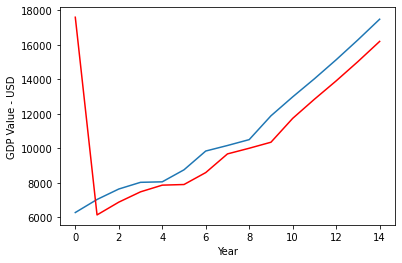

In [20]:
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('>Predicted = %.3f, Expected = %3.f' % (yhat, y[0]))


for i in range(1, len(y)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)

    obs=y[i]
    history.append(obs)
#     year += 1
    print('>Predicted = %.3f, Expected = %3.f' % (yhat, obs))
    
# mean squared error
mse = mean_squared_error(y, predictions)
# root mean squared error
rmse = sqrt(mse)
print('RMSE: %.2f' % rmse)
# mean absolute error
mae = mean_absolute_error(y, predictions)
print('MAE: %.2f' % mae)

# plot graph based on predictions (red) vs actuals (blue) from year 1990 to 2004
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.xlabel('Year')
pyplot.ylabel('GDP Value - USD')
pyplot.show()

In [21]:
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
forecast = model_fit.forecast(steps=12)[0]
print (forecast)

[17468.91642409 17444.90290363 17420.92239318 17396.97484738
 17373.06022089 17349.17846847 17325.32954493 17301.51340515
 17277.73000405 17253.97929663 17230.26123794 17206.57578312]


In [22]:
arr = (np.array([np.nan]))

In [23]:
# arr

In [24]:
for i in range(36):
    predictions.insert(0,arr)

In [25]:
# to identify prediction in 2030
year_2030 = predictions[40][0]
round(year_2030,2)

7870.68

Text(0, 0.5, 'GDP Value - Metric Ton')

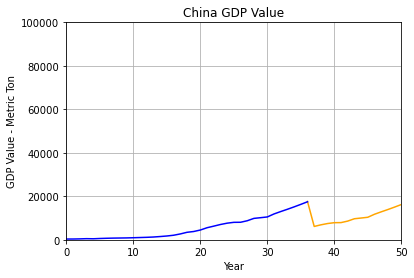

In [26]:
# prediction of GDP up to year 50. Year 0 is 1990, year 50 is 2040

plt.grid()
plt.plot(predictions, color = 'orange' )
plt.plot(x, color = 'b')
plt.xlim ((0,50))
plt.ylim ((0,100000))
plt.title('China GDP Value')
plt.xlabel('Year')
plt.ylabel('GDP Value - Metric Ton')

In [27]:
# for comparing purposes
for i in predictions:
    print (i[0])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
17607.07776908857
6144.5485545579995
6884.6871964338625
7482.759127208304
7870.682094422414
7907.292139240493
8599.634450278965
9682.66736410714
10010.993120622543
10359.713320306362
11743.24770514602
12853.333264078841
13917.725755160776
15035.318752805742
16206.121305497354
